In [1]:
# !pip install pickle-mixin

In [2]:
import parselmouth
from parselmouth.praat import call, run_file
import glob
import pandas as pd
import numpy as np
import scipy
from scipy.stats import binom
from scipy.stats import ks_2samp
from scipy.stats import ttest_ind
import os
import pickle
import matplotlib.pyplot as plt

In [3]:
p = r"E:/jupyter_project/FYP_1.1_pro"

In [4]:
def run_praat_expert(p):
    
    arrarOfData = []
#     E:\jupyter_project\FYP_1.1_pro\audio\copy_expert
    dir_lists = os.listdir('audio/copy_expert/')
    for dir_list in dir_lists:
        file_list = os.listdir('audio/copy_expert/' + dir_list)
        for audiofile in file_list:
            file_format = audiofile.split('.')[1]
#             print(file_format)
            if(file_format == "wav"):
                m = audiofile.split('.')[0]
                
                sound=p+"/"+"audio"+"/"+"copy_expert"+"/"+dir_list+"/"+m+".wav"
                sourcerun=p+"/"+"myprosody"+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
                path=p+"/"+"myprosodytest"+"/"+"expert"
#                 ppp =p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"+dir_list+"/"
                try:
                    objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
    #                 print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
                    z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
                    z2=z1.strip().split()
                    z3=int(z2[13]) # will be the integer number 10
                    z4=float(z2[14]) # will be the floating point number 8.3
                    db= binom.rvs(n=10,p=z4,size=10000)
                    a=np.array(db)
                    b=np.mean(a)*100/10
                    del z2[-1]
                    aaa = str(audiofile)
                    z2.append(format(b,'.2f'))
                    z2.append(aaa)
                    arrarOfData.append(z2)
    #                 print (dataset.T)
                except:
                    print ("Try again the sound of the audio was not clear")
    dff = pd.DataFrame(arrarOfData,columns=("number_of_syllables","number_of_pauses","rate_of_speech","articulation_rate","speaking_duration","original_duration","balance","f0_mean","f0_std","f0_median","f0_min","f0_max","f0_quantile25","f0_quan75","pronunciation_score_percentage","name_of_audio"))
#     print(arrarOfData)
    dff.to_csv('audio/metadata/expert_metadata.csv')
    print("done")

In [5]:
# run_praat_expert(p)

In [6]:
def run_praat_train(p):
    
    arrarOfData = []
    dir_lists = os.listdir('audio/copy_train/')
    for dir_list in dir_lists:
        file_list = os.listdir('audio/copy_train/' + dir_list)
        for audiofile in file_list:
            file_format = audiofile.split('.')[1]
#             print(file_format)
            if(file_format == "wav"):
                m = audiofile.split('.')[0]
                
                sound=p+"/"+"audio"+"/"+"copy_train"+"/"+dir_list+"/"+m+".wav"
                sourcerun=p+"/"+"myprosody"+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
                path=p+"/"+"myprosodytest"+"/"+"train"
                
                try:
                    objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
    #                 print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
                    z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
                    z2=z1.strip().split()
                    z3=int(z2[13]) # will be the integer number 10
                    z4=float(z2[14]) # will be the floating point number 8.3
                    db= binom.rvs(n=10,p=z4,size=10000)
                    a=np.array(db)
                    b=np.mean(a)*100/10
                    del z2[-1]
                    aaa = str(audiofile)
                    z2.append(format(b,'.2f'))
                    z2.append(aaa)
                    arrarOfData.append(z2)
                except:
                    print ("Try again the sound of the audio was not clear")
    dff = pd.DataFrame(arrarOfData,columns=("number_of_syllables","number_of_pauses","rate_of_speech","articulation_rate","speaking_duration","original_duration","balance","f0_mean","f0_std","f0_median","f0_min","f0_max","f0_quantile25","f0_quan75","pronunciation_score_percentage","name_of_audio"))
#     print(arrarOfData)
    dff.to_csv('audio/metadata/train_metadata.csv')
    print("done")

In [11]:
run_praat_expert(p)
run_praat_train(p)

done


In [8]:
# ## original one to get only one folder audio files
# def run_praat_file(p):
    
#     arrarOfData = []
    
#     dir_lists = os.listdir('myprosody/dataset/audioFiles/')
#     # print(dir_lists)
#     for dir_list in dir_lists:
#         file_format = dir_list.split('.')[1]
#     #     print(file_format)
#         if(file_format == "wav"):
#             m = dir_list.split('.')[0]
#             sound=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
#             sourcerun=p+"/"+"myprosody"+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
#             path=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"

#             try:
#                 objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
# #                 print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
#                 z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
#                 z2=z1.strip().split()
#                 z3=int(z2[13]) # will be the integer number 10
#                 z4=float(z2[14]) # will be the floating point number 8.3
#                 db= binom.rvs(n=10,p=z4,size=10000)
#                 a=np.array(db)
#                 b=np.mean(a)*100/10
#                 del z2[-1]
#                 aaa = str(dir_list)
#                 z2.append(format(b,'.2f'))
#                 z2.append(aaa)
#                 arrarOfData.append(z2)
# #                 print (dataset.T)
#             except:
#                 print ("Try again the sound of the audio was not clear")
#     dff = pd.DataFrame(arrarOfData,columns=("number_of_syllables","number_of_pauses","rate_of_speech","articulation_rate","speaking_duration","original_duration","balance","f0_mean","f0_std","f0_median","f0_min","f0_max","f0_quantile25","f0_quan75","Pronunciation_score_percentage","name_of_audio"))
# #     print(arrarOfData)
#     dff.to_csv('my_new_file.csv',index=False)

In [9]:
# run_praat_file(p)

In [93]:
## train data set file
train_metadata = pd.read_csv('audio/metadata/train_metadata.csv') 
train_metadata.head()

,Unnamed: 0,number_of_syllables,number_of_pauses,rate_of_speech,articulation_rate,speaking_duration,original_duration,balance,f0_mean,f0_std,f0_median,f0_min,f0_max,f0_quantile25,f0_quan75,pronunciation_score_percentage,name_of_audio
0,0,133,10,3,4,31.6,39.5,0.8,233.24,35.64,230.9,95,383,215,255,90.01,S100_P1_F.wav
1,1,145,13,4,4,33.0,40.9,0.8,262.39,54.99,257.9,80,418,229,297,100.00,S13_P1_f.wav
2,2,126,21,3,5,27.5,45.4,0.6,246.01,64.38,228.5,80,415,204,300,69.86,S15_P1_F.wav
3,3,160,7,4,5,33.1,38.1,0.9,270.39,42.15,266.0,87,412,242,302,94.98,S1_P1_F.wav
4,4,127,19,3,4,33.9,50.3,0.7,235.25,56.89,224.8,71,420,202,269,70.12,S2_P1_F.wav


In [94]:
## expert data set file
expert_metadata = pd.read_csv('audio/metadata/expert_metadata.csv') 
expert_metadata.head()

,Unnamed: 0,number_of_syllables,number_of_pauses,rate_of_speech,articulation_rate,speaking_duration,original_duration,balance,f0_mean,f0_std,f0_median,f0_min,f0_max,f0_quantile25,f0_quan75,pronunciation_score_percentage,name_of_audio
0,0,139,11,3,5,30.8,43.6,0.7,227.95,56.11,219.3,73,420,191,266,85.24,E2_P1.wav
1,1,581,37,4,5,113.8,143.6,0.8,207.09,47.44,203.7,80,421,174,227,94.99,E3_P1.wav
2,2,223,15,4,5,45.5,57.2,0.8,231.78,57.89,221.6,72,420,196,262,94.94,E2_P10.wav
3,3,202,16,4,5,42.1,54.2,0.8,235.23,56.20,224.8,75,420,200,272,94.98,E2_P11.wav
4,4,366,22,4,5,69.3,85.8,0.8,211.45,48.66,206.4,77,414,177,234,95.09,E3_P11.wav


In [95]:
# from tqdm import tqdm

In [96]:
# expert_audio_dataset_path = 'E:/jupyter_project/FYP_1.0_Project/audio/metadata'

In [116]:
# df_meal = pd.read_csv('audio/metadata/expert_metadata.csv') 
# for index_num,row in tqdm(expert_metadata.iterrows()):

#     file_name = os.path.join(os.path.abspath(expert_audio_dataset_path)+'/',str(row["name_of_audio"]))
#     print(file_name)
# #     data=spectro_creator(file_name)

20it [00:00, 4998.28it/s]

E:\jupyter_project\FYP_1.0_Project\audio\metadata/E2_P1.wav
E:\jupyter_project\FYP_1.0_Project\audio\metadata/E3_P1.wav
E:\jupyter_project\FYP_1.0_Project\audio\metadata/E2_P10.wav
E:\jupyter_project\FYP_1.0_Project\audio\metadata/E2_P11.wav
E:\jupyter_project\FYP_1.0_Project\audio\metadata/E3_P11.wav
E:\jupyter_project\FYP_1.0_Project\audio\metadata/E1_P12.wav
E:\jupyter_project\FYP_1.0_Project\audio\metadata/E2_P12.wav
E:\jupyter_project\FYP_1.0_Project\audio\metadata/E2_P13.wav
E:\jupyter_project\FYP_1.0_Project\audio\metadata/E3_P13.wav
E:\jupyter_project\FYP_1.0_Project\audio\metadata/E3_P15.wav
E:\jupyter_project\FYP_1.0_Project\audio\metadata/E2_P3.wav
E:\jupyter_project\FYP_1.0_Project\audio\metadata/E1_P4.wav
E:\jupyter_project\FYP_1.0_Project\audio\metadata/E2_P4.wav
E:\jupyter_project\FYP_1.0_Project\audio\metadata/E1_P5.wav
E:\jupyter_project\FYP_1.0_Project\audio\metadata/E2_P5.wav
E:\jupyter_project\FYP_1.0_Project\audio\metadata/E3_P5.wav
E:\jupyter_project\FYP_1.0_Proje

#### Audio triming using AUDITOK library 

In [14]:
# !pip install auditok

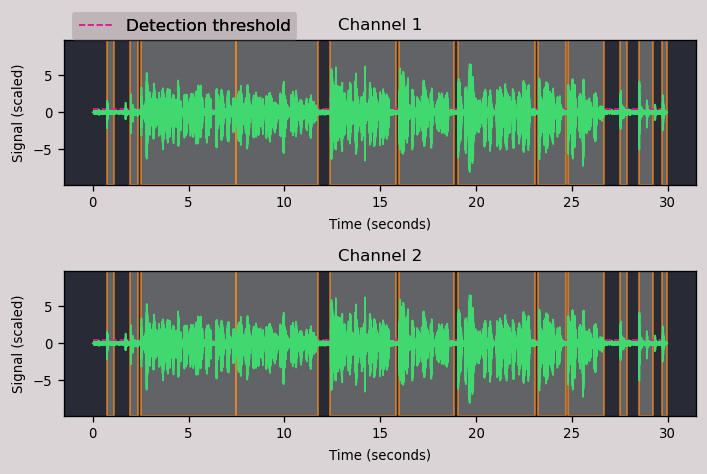

In [48]:
import auditok 
import cv2
import matplotlib.image as mtimg
audioFileName = "au/E1_P4.wav"

region = auditok.load(audioFileName) # returns an AudioRegion object
regions = region.split_and_plot() # or just region.splitp()


In [49]:
## get every audio file region create

# import auditok 
# import cv2

# dir_lists = os.listdir('au/')
# for audioFileName in dir_lists:
#     m = audioFileName.split('.')[0]
#     sound=p+"/"+"au"+"/"+m+".wav"
# #     print(sound)
#     region = auditok.load(sound) # returns an AudioRegion object
#     regions = region.split_and_plot() # or just region.splitp()
  
#     # print(regions)
#     audioCount = 0
#     for i in regions:    
#         audioCount = audioCount+i.duration
#     print(format(audioCount, '.3f'), audioFileName)

In [100]:
p = r"E:/jupyter_project/FYP_1.1_pro"

In [101]:
import auditok 
import cv2

def auditok_expert_file():
    extracted_features=[]

    dir_lists = os.listdir('audio/copy_expert/')
    for dir_list in dir_lists:
        audioCount = 0
        file_list = os.listdir('audio/copy_expert/' + dir_list)
        for audiofile in file_list:
            m = audiofile.split('.')[0]
            sound=p+"/"+"audio"+"/"+"copy_expert"+"/"+dir_list+"/"+m+".wav"
            region = auditok.load(sound) # returns an AudioRegion object
#             regions = region.splitp() # or just region.splitp()
            

            for i in regions:    
                audioCount = audioCount+i.duration
#             audio_time = format(audioCount, '.3f')
            arrData = [audiofile, format(audioCount, '.3f')]
            extracted_features.append(arrData)
#             print(arrData)
    df_data = pd.DataFrame(extracted_features,columns=("name_of_audio","speaking_time"))
    print(extracted_features)
    try:
        df_data.to_csv('audio/metadata/audio_speaking_expert.csv',index=False)
        print("done")
    except:
        print("allready created! ")

In [102]:
import auditok 
import cv2

def auditok_train_file():
    extracted_features=[]

    dir_lists = os.listdir('audio/copy_train/')
    for dir_list in dir_lists:
        audioCount = 0
        file_list = os.listdir('audio/copy_train/' + dir_list)
        for audiofile in file_list:
            m = audiofile.split('.')[0]
            sound=p+"/"+"audio"+"/"+"copy_train"+"/"+dir_list+"/"+m+".wav"
            region = auditok.load(sound) # returns an AudioRegion object
#             regions = region.splitp() # or just region.splitp()
            

            for i in regions:    
                audioCount = audioCount+i.duration
#             audio_time = format(audioCount, '.3f')
            arrData = [audiofile, format(audioCount, '.3f')]
            extracted_features.append(arrData)
#             print(arrData)
    df_data = pd.DataFrame(extracted_features,columns=("name_of_audio","speaking_time"))
    print(extracted_features)
    try:
        df_data.to_csv('audio/metadata/audio_speaking_train.csv',index=False)
        print("done")
    except:
        print("allready created! ")

In [103]:
auditok_expert_file()
auditok_train_file()

[['E2_P1.wav', '25.026'], ['E3_P1.wav', '50.052'], ['E2_P10.wav', '25.026'], ['E2_P11.wav', '25.026'], ['E3_P11.wav', '50.052'], ['E1_P12.wav', '25.026'], ['E2_P12.wav', '50.052'], ['E2_P13.wav', '25.026'], ['E3_P13.wav', '50.052'], ['E3_P15.wav', '25.026'], ['E2_P3.wav', '25.026'], ['E1_P4.wav', '25.026'], ['E2_P4.wav', '50.052'], ['E1_P5.wav', '25.026'], ['E2_P5.wav', '50.052'], ['E3_P5.wav', '75.078'], ['E1_P6.wav', '25.026'], ['E1_P7.wav', '25.026'], ['E1_P8.wav', '25.026'], ['E2_P8.wav', '50.052']]
done
[['S100_P1_F.wav', '25.026'], ['S13_P1_f.wav', '50.052'], ['S15_P1_F.wav', '75.078'], ['S1_P1_F.wav', '100.104'], ['S2_P1_F.wav', '125.130'], ['S30_P1_f.wav', '150.156'], ['S33_P1_f.wav', '175.182'], ['S34_P1_F.wav', '200.208'], ['S3_P1_F.wav', '225.234'], ['s40_p1_m.wav', '250.260'], ['s41_p1_f.wav', '275.286'], ['S42_P1_F.wav', '300.312'], ['s45_p1_f.wav', '325.338'], ['s47_p1_m.wav', '350.364'], ['S52_P1_F.wav', '375.390'], ['S53_P1_F.wav', '400.416'], ['S57_P1_F.wav', '425.442'

####  mearge the two csv file and create updatecsv file 

In [ ]:
a_ex = pd.read_csv('audio/metadata/expert_metadata.csv')
b_ex = pd.read_csv('audio/metadata/audio_speaking_expert.csv')
merged_expert = a_ex.merge(b_ex, on='name_of_audio')
merged_expert.to_csv("audio/metadata/expert_metadata_update.csv", index=False)

a_tr = pd.read_csv('audio/metadata/train_metadata.csv')
b_tr = pd.read_csv('audio/metadata/audio_speaking_train.csv')
merged_train = a_tr.merge(b_tr, on='name_of_audio')
merged_train.to_csv("audio/metadata/train_metadata_update.csv", index=False)

In [ ]:
# dir_lists = os.listdir('au/')
# for audioFileName in dir_lists:
#     m = audioFileName.split('.')[0]
#     sound=p+"/"+"au"+"/"+m+".wav"
# #     print(sound)
#     region = auditok.load(sound) # returns an AudioRegion object
#     regions = region.split_and_plot() # or just region.splitp()
  
#     # print(regions)
#     audioCount = 0
#     avarage_audio = 0
#     for i in regions:    
#         audioCount = audioCount+i.duration
# #     print(format(audioCount, '.3f'), audioFileName)
#     audio_time = format(audioCount, '.3f')
#     arrData = [audioFileName, audio_time]
#     extracted_features.append(arrData)
#     print(arrData)
#     dff = pd.DataFrame(extracted_features,columns=("name_of_audio","speaking_time"))
#     #     print(arrarOfData)
#     dff.to_csv('audio_speaking.csv',index=False)

In [ ]:
import wave
import contextlib
fname = 'E1_P4.wav'
with contextlib.closing(wave.open(fname,'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)
    print(duration)

In [ ]:
import scipy
from scipy.io import wavfile

In [ ]:

# Method 3
import scipy
from scipy.io import wavfile
  
# function to convert the information into 
# some readable format
def output_duration(length):
    hours = length // 3600  # calculate in hours
    length %= 3600
    mins = length // 60  # calculate in minutes
    length %= 60
    seconds = length  # calculate in seconds
  
    return hours, mins, seconds
  
# sample_rate holds the sample rate of the wav file
# in (sample/sec) format
# data is the numpy array that consists
# of actual data read from the wav file
sample_rate, data = wavfile.read('E1_P4.wav')
  
len_data = len(data)  # holds length of the numpy array
  
t = len_data / sample_rate  # returns duration but in floats
  
hours, mins, seconds = output_duration(int(t))
print('Total Duration: {}:{}:{}'.format(hours, mins, seconds))

In [ ]:
# def myspsyl(p):
#     """
#     Detect and count number of syllables
#     """
#     z2 = run_praat_file(p)
#     z3=int(z2[0]) # will be the integer number 10
#     z4=float(z2[3]) # will be the floating point number 8.3
#     print ("number_ of_syllables=",z3)
#     return z3

In [ ]:
# # Detect and count number of syllables
# myspsyl(p)

In [ ]:
def mysppaus(p):
    """
    Detect and count number of fillers and pauses
    """
    dir_list = os.listdir('myprosody/dataset/audioFiles/')
    # print(dir_list)
    for dir_list in dir_list:
        file_format = dir_list.split('.')[1]
    #     print(file_format)
        if(file_format == "wav"):
            m = dir_list.split('.')[0]
            sound=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
            sourcerun=p+"/"+"myprosody"+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
            path=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+ "/"

            try:
                objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
#                 print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
                z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
                z2=z1.strip().split()
                z3=int(z2[1]) # will be the integer number 10
                z4=float(z2[3]) # will be the floating point number 8.3
                print ("number_of_pauses=",z3)
            except:
                print ("Try again the sound of the audio was not clear")
    

In [ ]:
# Detect and count number of fillers and pauses
mysppaus(p)

In [ ]:
def myspsr(p):
    """
    Measure the rate of speech (speed)
    """
    dir_list = os.listdir('myprosody/dataset/audioFiles/')
    # print(dir_list)
    for dir_list in dir_list:
        file_format = dir_list.split('.')[1]
    #     print(file_format)
        if(file_format == "wav"):
            m = dir_list.split('.')[0]
            sound=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
            sourcerun=p+"/"+"myprosody"+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
            path=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"

            try:
                objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
#                 print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
                z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
                z2=z1.strip().split()
                z3=int(z2[2]) # will be the integer number 10
                z4=float(z2[3]) # will be the floating point number 8.3
                print ("rate_of_speech=",z3,"# syllables/sec original duration")
            except:
                print ("Try again the sound of the audio was not clear")


In [ ]:
#   Measure the rate of speech (speed)
myspsr(p)

In [ ]:
def myspatc(p):
    """
    Measure the articulation (speed)
    """
    dir_list = os.listdir('myprosody/dataset/audioFiles/')
    # print(dir_list)
    for dir_list in dir_list:
        file_format = dir_list.split('.')[1]
    #     print(file_format)
        if(file_format == "wav"):
            m = dir_list.split('.')[0]
            sound=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
            sourcerun=p+"/"+"myprosody"+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
            path=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"

            try:
                objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
#                 print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
                z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
                z2=z1.strip().split()         
                z3=int(z2[3]) # will be the integer number 10
                z4=float(z2[3]) # will be the floating point number 8.3
                print ("articulation_rate=",z3,"# syllables/sec speaking duration")
            except:
                print ("Try again the sound of the audio was not clear")




In [ ]:
# Measure the articulation (speed)
myspatc(p)

In [ ]:
def myspst(p):
    """
    Measure speaking time (excl. fillers and pause)
    """
    dir_list = os.listdir('myprosody/dataset/audioFiles/')
    # print(dir_list)
    for dir_list in dir_list:
        file_format = dir_list.split('.')[1]
    #     print(file_format)
        if(file_format == "wav"):
            m = dir_list.split('.')[0]
            sound=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
            sourcerun=p+"/"+"myprosody"+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
            path=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"

            try:
                objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
#                 print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
                z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
                z2=z1.strip().split()          
                z3=int(z2[3]) # will be the integer number 10
                z4=float(z2[4]) # will be the floating point number 8.3
                print ("speaking_duration=",z4,"# sec only speaking duration without pauses")
            except:
                print ("Try again the sound of the audio was not clear")



In [ ]:
# Measure speaking time (excl. fillers and pause)
myspst(p)

In [ ]:
def myspod(p):
    """
    Measure total speaking duration (inc. fillers and pauses)
    """
    dir_list = os.listdir('myprosody/dataset/audioFiles/')
    # print(dir_list)
    for dir_list in dir_list:
        file_format = dir_list.split('.')[1]
    #     print(file_format)
        if(file_format == "wav"):
            m = dir_list.split('.')[0]
            sound=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
            sourcerun=p+"/"+"myprosody"+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
            path=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"

            try:
                objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
#                 print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
                z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
                z2=z1.strip().split()         
                z3=int(z2[3]) # will be the integer number 10
                z4=float(z2[5]) # will be the floating point number 8.3
                print ("original_duration=",z4,"# sec total speaking duration with pauses")

            except:
                print ("Try again the sound of the audio was not clear")


    

In [ ]:
# Measure total speaking duration (inc. fillers and pauses)
myspod(p)

In [ ]:
def myspbala(p):
    """
    Measure ratio between speaking duration and total speaking duration
    """
    dir_list = os.listdir('myprosody/dataset/audioFiles/')
    # print(dir_list)
    for dir_list in dir_list:
        file_format = dir_list.split('.')[1]
    #     print(file_format)
        if(file_format == "wav"):
            m = dir_list.split('.')[0]
            sound=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
            sourcerun=p+"/"+"myprosody"+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
            path=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"

            try:
                objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
#                 print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
                z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
                z2=z1.strip().split()       
                z3=int(z2[3]) # will be the integer number 10
                z4=float(z2[6]) # will be the floating point number 8.3
                print ("balance=",z4,"# ratio (speaking duration)/(original duration)")
            except:
                print ("Try again the sound of the audio was not clear")

In [ ]:
#  Measure ratio between speaking duration and total speaking duration
myspbala(p)

In [ ]:
def myspf0mean(p):
    """
    Measure fundamental frequency distribution mean
    """
    dir_list = os.listdir('myprosody/dataset/audioFiles/')
    # print(dir_list)
    for dir_list in dir_list:
        file_format = dir_list.split('.')[1]
    #     print(file_format)
        if(file_format == "wav"):
            m = dir_list.split('.')[0]
            sound=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
            sourcerun=p+"/"+"myprosody"+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
            path=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"

            try:
                objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
#                 print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
                z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
                z2=z1.strip().split()          
                z3=int(z2[3]) # will be the integer number 10
                z4=float(z2[7]) # will be the floating point number 8.3
                print ("f0_mean=",z4,"# Hz global mean of fundamental frequency distribution")
            except:
                print ("Try again the sound of the audio was not clear")

In [ ]:
# Measure fundamental frequency distribution mean
myspf0mean(p)

In [ ]:
def myspf0sd(p):
    """
    Measure fundamental frequency distribution SD
    """
    dir_list = os.listdir('myprosody/dataset/audioFiles/')
    # print(dir_list)
    for dir_list in dir_list:
        file_format = dir_list.split('.')[1]
    #     print(file_format)
        if(file_format == "wav"):
            m = dir_list.split('.')[0]
            sound=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
            sourcerun=p+"/"+"myprosody"+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
            path=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"

            try:
                objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
#                 print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
                z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
                z2=z1.strip().split()        
                z3=int(z2[3]) # will be the integer number 10
                z4=float(z2[8]) # will be the floating point number 8.3
                print ("f0_SD=",z4,"# Hz global standard deviation of fundamental frequency distribution")
            except:
                print ("Try again the sound of the audio was not clear")

In [ ]:
# Measure fundamental frequency distribution SD
myspf0sd(p)

In [ ]:
def myspf0med(p):
    """
    Measure fundamental frequency distribution median
    """
    dir_list = os.listdir('myprosody/dataset/audioFiles/')
    # print(dir_list)
    for dir_list in dir_list:
        file_format = dir_list.split('.')[1]
    #     print(file_format)
        if(file_format == "wav"):
            m = dir_list.split('.')[0]
            sound=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
            sourcerun=p+"/"+"myprosody"+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
            path=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"

            try:
                objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
#                 print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
                z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
                z2=z1.strip().split()     
                z3=int(z2[3]) # will be the integer number 10
                z4=float(z2[9]) # will be the floating point number 8.3
                print ("f0_MD=",z4,"# Hz global median of fundamental frequency distribution")
            except:
                print ("Try again the sound of the audio was not clear")
   

In [ ]:
# Measure fundamental frequency distribution median
myspf0med(p)

In [ ]:
def myspf0min(p):
    """
    Measure fundamental frequency distribution minimum
    """
    dir_list = os.listdir('myprosody/dataset/audioFiles/')
    # print(dir_list)
    for dir_list in dir_list:
        file_format = dir_list.split('.')[1]
    #     print(file_format)
        if(file_format == "wav"):
            m = dir_list.split('.')[0]
            sound=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
            sourcerun=p+"/"+"myprosody"+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
            path=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"

            try:
                objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
#                 print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
                z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
                z2=z1.strip().split()   
                z3=int(z2[10]) # will be the integer number 10
                z4=float(z2[10]) # will be the floating point number 8.3
                print ("f0_min=",z3,"# Hz global minimum of fundamental frequency distribution")
            except:
                print ("Try again the sound of the audio was not clear")


    

In [ ]:
# Measure fundamental frequency distribution minimum
myspf0min(p)

In [ ]:
def myspf0max(p):
    """
    Measure fundamental frequency distribution maximum
    """
    dir_list = os.listdir('myprosody/dataset/audioFiles/')
    # print(dir_list)
    for dir_list in dir_list:
        file_format = dir_list.split('.')[1]
    #     print(file_format)
        if(file_format == "wav"):
            m = dir_list.split('.')[0]
            sound=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
            sourcerun=p+"/"+"myprosody"+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
            path=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"

            try:
                objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
#                 print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
                z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
                z2=z1.strip().split()         
                z3=int(z2[11]) # will be the integer number 10
                z4=float(z2[11]) # will be the floating point number 8.3
                print ("f0_max=",z3,"# Hz global maximum of fundamental frequency distribution")
            except:
                print ("Try again the sound of the audio was not clear")



In [ ]:
# Measure fundamental frequency distribution maximum
myspf0max(p)

In [ ]:
def myspf0q25(p):
    """
    Measure 25th quantile fundamental frequency distribution
    """
    dir_list = os.listdir('myprosody/dataset/audioFiles/')
    # print(dir_list)
    for dir_list in dir_list:
        file_format = dir_list.split('.')[1]
    #     print(file_format)
        if(file_format == "wav"):
            m = dir_list.split('.')[0]
            sound=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
            sourcerun=p+"/"+"myprosody"+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
            path=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"

            try:
                objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
#                 print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
                z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
                z2=z1.strip().split()         
                z3=int(z2[12]) # will be the integer number 10
                z4=float(z2[11]) # will be the floating point number 8.3
                print ("f0_quan25=",z3,"# Hz global 25th quantile of fundamental frequency distribution")
            except:
                print ("Try again the sound of the audio was not clear")



In [ ]:
# Measure 25th quantile fundamental frequency distribution
myspf0q25(p)

In [ ]:
def myspf0q75(p):
    """
    Measure 75th quantile fundamental frequency distribution
    """
    dir_list = os.listdir('myprosody/dataset/audioFiles/')
    # print(dir_list)
    for dir_list in dir_list:
        file_format = dir_list.split('.')[1]
    #     print(file_format)
        if(file_format == "wav"):
            m = dir_list.split('.')[0]
            sound=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
            sourcerun=p+"/"+"myprosody"+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
            path=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"

            try:
                objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
#                 print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
                z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
                z2=z1.strip().split() 
                z3=int(z2[13]) # will be the integer number 10
                z4=float(z2[11]) # will be the floating point number 8.3
                print ("f0_quan75=",z3,"# Hz global 75th quantile of fundamental frequency distribution")
            except:
                print ("Try again the sound of the audio was not clear")




In [ ]:
# Measure 75th quantile fundamental frequency distribution
myspf0q75(p)

In [ ]:
def mysptotal(p):
    """
    Overview
    """
    dir_list = os.listdir('myprosody/dataset/audioFiles/')
    # print(dir_list)
    for dir_list in dir_list:
        file_format = dir_list.split('.')[1]
    #     print(file_format)
        if(file_format == "wav"):
            m = dir_list.split('.')[0]
            sound=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
            sourcerun=p+"/"+"myprosody"+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
            path=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"
            
            try:
                objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
#                 print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
                z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
                z2=z1.strip().split()          
                z3=np.array(z2)
                z4=np.array(z3)[np.newaxis]
                z5=z4.T
                dataset=pd.DataFrame({"name_of_audio":m,"number_ of_syllables":z5[0,:],"number_of_pauses":z5[1,:],"rate_of_speech":z5[2,:],"articulation_rate":z5[3,:],"speaking_duration":z5[4,:],
                        "original_duration":z5[5,:],"balance":z5[6,:],"f0_mean":z5[7,:],"f0_std":z5[8,:],"f0_median":z5[9,:],"f0_min":z5[10,:],"f0_max":z5[11,:],
                        "f0_quantile25":z5[12,:],"f0_quan75":z5[13,:]})
                print (dataset.T)
            except:
                print ("Try again the sound of the audio was not clear")


   

In [ ]:
#  Overview
mysptotal(p)

In [ ]:
def mysppron(p):
    """
    Pronunciation posteriori probability score percentage
    """
    dir_list = os.listdir('myprosody/dataset/audioFiles/')
    # print(dir_list)
    for dir_list in dir_list:
        file_format = dir_list.split('.')[1]
    #     print(file_format)
        if(file_format == "wav"):
            m = dir_list.split('.')[0]
            sound=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
            sourcerun=p+"/"+"myprosody"+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
            path=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"

            try:
                objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
#                 print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
                z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
                z2=z1.strip().split()
                z3=int(z2[13]) # will be the integer number 10
                z4=float(z2[14]) # will be the floating point number 8.3
                db= binom.rvs(n=10,p=z4,size=10000)
                a=np.array(db)
                b=np.mean(a)*100/10
                print ("Pronunciation_posteriori_probability_score_percentage= :%.2f" % (b))
            except:
                print ("Try again the sound of the audio was not clear")



In [ ]:
#  Pronunciation posteriori probability score percentage
mysppron(p)

In [ ]:
def myspgend(p):
    """
    Gender recognition and mood of speech
    """
    dir_list = os.listdir('myprosody/dataset/audioFiles/')
    # print(dir_list)
    for dir_list in dir_list:
        file_format = dir_list.split('.')[1]
    #     print(file_format)
        if(file_format == "wav"):
            m = dir_list.split('.')[0]
            sound=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
            sourcerun=p+"/"+"myprosody"+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
            path=p+"/"+"myprosody"+"/"+"dataset"+"/"+"audioFiles"+"/"

            try:
                objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
#                 print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
                z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
                z2=z1.strip().split()
        
                z3=float(z2[8]) # will be the integer number 10
                z4=float(z2[7]) # will be the floating point number 8.3
                if z4<=114:
                    g=101
                    j=3.4
                elif z4>114 and z4<=135:
                    g=128
                    j=4.35
                elif z4>135 and z4<=163:
                    g=142
                    j=4.85
                elif z4>163 and z4<=197:
                    g=182
                    j=2.7
                elif z4>197 and z4<=226:
                    g=213
                    j=4.5
                elif z4>226:
                    g=239
                    j=5.3
                else:
                    print("Voice not recognized")
                    exit()
                def teset(a,b,c,d):
                    d1=np.random.wald(a, 1, 1000)
                    d2=np.random.wald(b,1,1000)
                    d3=ks_2samp(d1, d2)
                    c1=np.random.normal(a,c,1000)
                    c2=np.random.normal(b,d,1000)
                    c3=ttest_ind(c1,c2)
                    y=([d3[0],d3[1],abs(c3[0]),c3[1]])
                    return y
                nn=0
                mm=teset(g,j,z4,z3)
                while (mm[3]>0.05 and mm[0]>0.04 or nn<5):
                    mm=teset(g,j,z4,z3)
                    nn=nn+1
                nnn=nn
                if mm[3]<=0.09:
                    mmm=mm[3]
                else:
                    mmm=0.35
                if z4>97 and z4<=114:
                    print("a Male, mood of speech: Showing no emotion, normal, p-value/sample size= :%.2f" % (mmm), (nnn))
                elif z4>114 and z4<=135:
                    print("a Male, mood of speech: Reading, p-value/sample size= :%.2f" % (mmm), (nnn))
                elif z4>135 and z4<=163:
                    print("a Male, mood of speech: speaking passionately, p-value/sample size= :%.2f" % (mmm), (nnn))
                elif z4>163 and z4<=197:
                    print("a female, mood of speech: Showing no emotion, normal, p-value/sample size= :%.2f" % (mmm), (nnn))
                elif z4>197 and z4<=226:
                    print("a female, mood of speech: Reading, p-value/sample size= :%.2f" % (mmm), (nnn))
                elif z4>226 and z4<=245:
                    print("a female, mood of speech: speaking passionately, p-value/sample size= :%.2f" % (mmm), (nnn))
                else:
                    print("Voice not recognized")
            except:
                print ("Try again the sound of the audio was not clear")



In [ ]:
# Gender recognition and mood of speech
myspgend(p)

In [ ]:
# !pip install myprosody

In [ ]:
# m='E1_P4'
# p = r"C:/Users/Dilakshana/new_FYP_project/fyp_1.1_process/myprosody"

p='E1_P4'
c = r"C:/Users/Dilakshana/new_FYP_project/fyp_1.1_process/myprosody"

In [ ]:
# def myprosody(m,p):
#     """
#     Compared to native speech, here are the prosodic features of your speech
#     """
#     sound=p+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
#     sourcerun=p+"/"+"dataset"+"/"+"essen"+"/"+"MLTRNL.praat"
#     path=p+"/"+"dataset"+"/"+"audioFiles"+"/"
#     outo=p+"/"+"dataset"+"/"+"datanewchi22.csv"
#     outst=p+"/"+"dataset"+"/"+"datanewchi44.csv"
#     outsy=p+"/"+"dataset"+"/"+"datanewchi33.csv"
#     pa2=p+"/"+"dataset"+"/"+"stats.csv"
#     pa7=p+"/"+"dataset"+"/"+"datanewchi44.csv" 
#     result_array = np.empty((0, 100))
#     files = glob.glob(path)
#     result_array = np.empty((0, 27))
#     try:
#         objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
#         z1=( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
#         z3=z1.strip().split()
#         z2=np.array([z3])
#         result_array=np.append(result_array,[z3], axis=0)
#         #print(z3)
#         np.savetxt(outo,result_array, fmt='%s',delimiter=',')
#         #Data and features analysis
#         df = pd.read_csv(outo, names = ['avepauseduratin','avelongpause','speakingtot','avenumberofwords','articulationrate','inpro','f1norm','mr','q25','q50','q75','std','fmax','fmin','vowelinx1','vowelinx2','formantmean','formantstd','nuofwrds','npause','ins','fillerratio','xx','xxx','totsco','xxban','speakingrate'],na_values='?')
#         scoreMLdataset=df.drop(['xxx','xxban'], axis=1)
#         scoreMLdataset.to_csv(outst, header=False,index = False)
#         newMLdataset=df.drop(['avenumberofwords','f1norm','inpro','q25','q75','vowelinx1','nuofwrds','npause','xx','totsco','xxban','speakingrate','fillerratio'], axis=1)
#         newMLdataset.to_csv(outsy, header=False,index = False)
#         namess=nms = ['avepauseduratin','avelongpause','speakingtot','articulationrate','mr','q50','std','fmax','fmin','vowelinx2','formantmean','formantstd','ins','xxx']
#         df1 = pd.read_csv(outsy, names = namess)
#         nsns=['average_syll_pause_duration','No._long_pause','speaking_time','ave_No._of_words_in_minutes','articulation_rate','No._words_in_minutes','formants_index','f0_index','f0_quantile_25_index','f0_quantile_50_index','f0_quantile_75_index','f0_std','f0_max','f0_min','No._detected_vowel','perc%._correct_vowel','(f2/f1)_mean','(f2/f1)_std','no._of_words','no._of_pauses','intonation_index','(voiced_syll_count)/(no_of_pause)','TOEFL_Scale_Score','Score_Shannon_index','speaking_rate']
#         dataframe = pd.read_csv(pa2)
#         df55 = pd.read_csv(outst,names=nsns)
#         dataframe=dataframe.values
#         array = df55.values
#         print("Compared to native speech, here are the prosodic features of your speech:")
#         for i in range(25):
#             sl0=dataframe[4:7:1,i+1]
#             score = array[0,i]
#             he=scipy.stats.percentileofscore(sl0, score, kind='strict')
#             if he==0:
#                 he=25
#                 dfout = "%s:\t %f (%s)" %  (nsns[i],he,"% percentile ")
#                 print(dfout)
#             elif he>=25 and he<=75:
#                 dfout = "%s:\t %f (%s)" % (nsns[i],he,"% percentile ")
#                 print(dfout)
#             else:
#                 dfout = "%s:\t (%s)" % (nsns[i],":Out of Range")
#                 print(dfout)
#     except:
#         print ("Try again the sound of the audio was not clear")

In [ ]:
# Compared to native speech, here are the prosodic features of your speech
myprosody(m,p)

In [ ]:
import myprosody as mysp
import pickle


In [ ]:
mysp.mysppron(p,c)

In [ ]:
# def mysplev(m,p):
#     """
#     Spoken Language Proficiency Level estimator, 
#     based on Machine Learning models of the prosodic features of your speech
#     """
#     import sys
#     def my_except_hook(exctype, value, traceback):
#         print('There has been an error in the system')
#     sys.excepthook = my_except_hook
#     import warnings
#     if not sys.warnoptions:
#         warnings.simplefilter("ignore")
#     sound=p+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
#     sourcerun=p+"/"+"dataset"+"/"+"essen"+"/"+"MLTRNL.praat"
#     path=p+"/"+"dataset"+"/"+"audioFiles"+"/"
#     pa1=p+"/"+"dataset"+"/"+"datanewchi23.csv"
#     pa7=p+"/"+"dataset"+"/"+"datanewchi45.csv"
#     pa5=p+"/"+"dataset"+"/"+"datanewchi34.csv"
#     result_array = np.empty((0, 100))
#     ph = sound
#     files = glob.glob(ph)
#     result_array = np.empty((0, 27))
#     try:
#         for soundi in files:
#             objects= run_file(sourcerun, -20, 2, 0.3, "yes", soundi, path, 80, 400, 0.01, capture_output=True)
#             print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
#             z1=( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
#             z3=z1.strip().split()
#             z2=np.array([z3])
#             result_array=np.append(result_array,[z3], axis=0)

#         np.savetxt(pa1,result_array, fmt='%s',delimiter=',')
#         #Data and features analysis 
#         df = pd.read_csv(pa1, names = ['avepauseduratin','avelongpause','speakingtot','avenumberofwords','articulationrate','inpro','f1norm','mr','q25','q50','q75','std','fmax','fmin','vowelinx1','vowelinx2','formantmean','formantstd','nuofwrds','npause','ins','fillerratio','xx','xxx','totsco','xxban','speakingrate'],na_values='?')

#         scoreMLdataset=df.drop(['xxx','xxban'], axis=1)
#         scoreMLdataset.to_csv(pa7, header=False,index = False)
#         newMLdataset=df.drop(['avenumberofwords','f1norm','inpro','q25','q75','vowelinx1','nuofwrds','npause','xx','totsco','xxban','speakingrate','fillerratio'], axis=1)
#         newMLdataset.to_csv(pa5, header=False,index = False)
#         namess=nms = ['avepauseduratin','avelongpause','speakingtot','articulationrate','mr','q50','std','fmax','fmin','vowelinx2','formantmean','formantstd','ins','xxx']
#         df1 = pd.read_csv(pa5,names = namess)
#         df33=df1.drop(['xxx'], axis=1)
#         array = df33.values
#         array=np.log(array)
#         x = array[:,0:13]

#         def myspp(bp,bg):
#             sound=bg+"/"+"dataset"+"/"+"audioFiles"+"/"+bp+".wav"
#             sourcerun=bg+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
#             path=bg+"/"+"dataset"+"/"+"audioFiles"+"/"
#             objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
#             print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
#             z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
#             z2=z1.strip().split()
#             z3=int(z2[13]) # will be the integer number 10
#             z4=float(z2[14]) # will be the floating point number 8.3
#             db= binom.rvs(n=10,p=z4,size=10000)
#             a=np.array(db)
#             b=np.mean(a)*100/10
#             return b

#         bp=m
#         bg=p
#         bi=myspp(bp,bg)
#         if bi<85:
#             input("Try again, unnatural-sounding speech detected. No further result. Press any key to exit.")
#             exit()

#         filename=p+"/"+"dataset"+"/"+"essen"+"/"+"CART_model.sav"
#         model = pickle.load(open(filename, 'rb'))
#         predictions = model.predict(x)
#         print("58% accuracy    ",predictions)

#         filename=p+"/"+"dataset"+"/"+"essen"+"/"+"KNN_model.sav"
#         model = pickle.load(open(filename, 'rb'))
#         predictions = model.predict(x)
#         print("65% accuracy    ",predictions)

#         filename=p+"/"+"dataset"+"/"+"essen"+"/"+"LDA_model.sav"
#         model = pickle.load(open(filename, 'rb'))
#         predictions = model.predict(x)
#         print("70% accuracy    ",predictions)
    
#         filename=p+"/"+"dataset"+"/"+"essen"+"/"+"LR_model.sav"
#         model = pickle.load(open(filename, 'rb'))
#         predictions = model.predict(x)
#         print("67% accuracy    ",predictions)

#         filename=p+"/"+"dataset"+"/"+"essen"+"/"+"NB_model.sav"
#         model = pickle.load(open(filename, 'rb'))
#         predictions = model.predict(x)
#         print("64% accuracy    ",predictions)

#         filename=p+"/"+"dataset"+"/"+"essen"+"/"+"SVN_model.sav"
#         model = pickle.load(open(filename, 'rb'))
#         predictions = model.predict(x)
#         print("63% accuracy    ",predictions)
#     except:
#         print ("Try again the sound of the audio was not clear")

In [ ]:
# # Spoken Language Proficiency Level estimator, 
# # based on Machine Learning models of the prosodic features of your speech
# mysplev(m,p)

In [ ]:
# def mysplevf(m,p):
#     import sys
#     def my_except_hook(exctype, value, traceback):
#         print('There has been an error in the system')
#     sys.excepthook = my_except_hook
#     import warnings
#     if not sys.warnoptions:
#         warnings.simplefilter("ignore")
#     sound=p+"/"+"dataset"+"/"+"audioFiles"+"/"+m+".wav"
#     sourcerun=p+"/"+"dataset"+"/"+"essen"+"/"+"MLTRNL.praat"
#     path=p+"/"+"dataset"+"/"+"audioFiles"+"/"
#     pa1=p+"/"+"dataset"+"/"+"datanewchi23.csv"
#     pa7=p+"/"+"dataset"+"/"+"datanewchi45.csv"
#     pa5=p+"/"+"dataset"+"/"+"datanewchi34.csv"
#     result_array = np.empty((0, 100))
#     ph = sound
#     files = glob.glob(ph)
#     result_array = np.empty((0, 27))
#     try:
#         for soundi in files:
#             objects= run_file(sourcerun, -20, 2, 0.3, "yes", soundi, path, 80, 400, 0.01, capture_output=True)
#             #print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
#             z1=( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
#             z3=z1.strip().split()
#             z2=np.array([z3])
#             result_array=np.append(result_array,[z3], axis=0)

#         np.savetxt(pa1,result_array, fmt='%s',delimiter=',')
#         #Data and features analysis
#         df = pd.read_csv(pa1, names = ['avepauseduratin','avelongpause','speakingtot','avenumberofwords','articulationrate','inpro','f1norm','mr','q25',
#                                       'q50','q75','std','fmax','fmin','vowelinx1','vowelinx2','formantmean','formantstd','nuofwrds','npause','ins',
#                                       'fillerratio','xx','xxx','totsco','xxban','speakingrate'],na_values='?')

#         scoreMLdataset=df.drop(['xxx','xxban'], axis=1)
#         scoreMLdataset.to_csv(pa7, header=False,index = False)
#         newMLdataset=df.drop(['avenumberofwords','f1norm','inpro','q25','q75','vowelinx1','nuofwrds','npause','xx','totsco','xxban','speakingrate','fillerratio'], axis=1)
#         newMLdataset.to_csv(pa5, header=False,index = False)
#         namess=nms = ['avepauseduratin','avelongpause','speakingtot','articulationrate','mr',
#                                       'q50','std','fmax','fmin','vowelinx2','formantmean','formantstd','ins',
#                                       'xxx']
#         df1 = pd.read_csv(pa5,
#                                 names = namess)
#         df33=df1.drop(['xxx'], axis=1)
#         array = df33.values
#         array=np.log(array)
#         x = array[:,0:13]

#         def myspp(bp,bg):
#           sound=bg+"/"+"dataset"+"/"+"audioFiles"+"/"+bp+".wav"
#           sourcerun=bg+"/"+"dataset"+"/"+"essen"+"/"+"myspsolution.praat"
#           path=bg+"/"+"dataset"+"/"+"audioFiles"+"/"
#           objects= run_file(sourcerun, -20, 2, 0.3, "yes",sound,path, 80, 400, 0.01, capture_output=True)
#           print (objects[0]) # This will print the info from the sound object, and objects[0] is a parselmouth.Sound object
#           z1=str( objects[1]) # This will print the info from the textgrid object, and objects[1] is a parselmouth.Data object with a TextGrid inside
#           z2=z1.strip().split()
#           z3=int(z2[13]) # will be the integer number 10
#           z4=float(z2[14]) # will be the floating point number 8.3
#           db= binom.rvs(n=10,p=z4,size=10000)
#           a=np.array(db)
#           b=np.mean(a)*100/10
#           return b

#         bp=m
#         bg=p
#         bi=myspp(bp,bg)
#         if bi<85:
#             input("Try again, unnatural-sounding speech detected. No further result. Press any key to exit.")
#             exit()

#         filename=p+"/"+"dataset"+"/"+"essen"+"/"+"CART_model.sav"
#         model = pickle.load(open(filename, 'rb'))
#         predictions = model.predict(x)
#         print("58% accuracy    ",predictions)

#         filename=p+"/"+"dataset"+"/"+"essen"+"/"+"KNN_model.sav"
#         model = pickle.load(open(filename, 'rb'))
#         predictions = model.predict(x)
#         print("65% accuracy    ",predictions)

#         filename=p+"/"+"dataset"+"/"+"essen"+"/"+"LDA_model.sav"
#         model = pickle.load(open(filename, 'rb'))
#         predictions = model.predict(x)
#         print("70% accuracy    ",predictions)

#         filename=p+"/"+"dataset"+"/"+"essen"+"/"+"LR_model.sav"
#         model = pickle.load(open(filename, 'rb'))
#         predictions = model.predict(x)
#         print("67% accuracy    ",predictions)

#         filename=p+"/"+"dataset"+"/"+"essen"+"/"+"NB_model.sav"
#         model = pickle.load(open(filename, 'rb'))
#         predictions = model.predict(x)
#         print("64% accuracy    ",predictions)

#         filename=p+"/"+"dataset"+"/"+"essen"+"/"+"SVN_model.sav"
#         model = pickle.load(open(filename, 'rb'))
#         predictions = model.predict(x)
#         print("63% accuracy    ",predictions)
#     except:
#         print ("Try again the sound of the audio was not clear")

In [ ]:
# mysplevf(m,p)